In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Photos.rar", outdir="/content")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
patool: Extracting /content/drive/MyDrive/Photos.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/Photos.rar
patool:     with cwd='/content'


PatoolError: ignored

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import shutil
'''
directory = r"/content/drive/MyDrive/Photos.rar"
male,female = [],[]
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if filename == 'Male':
        for i in os.listdir(f):
            temp = os.path.join(f, i)
            img = cv2.imread(temp,0)
            male.append(cv2.resize(img,(256,256)))
    if filename == 'Female':
        for i in os.listdir(f):
            temp = os.path.join(f, i)
            img = cv2.imread(temp,0)           
            female.append(cv2.resize(img,(256,256)))
'''

'\ndirectory = r"/content/drive/MyDrive/Photos.rar"\nmale,female = [],[]\nfor filename in os.listdir(directory):\n    f = os.path.join(directory, filename)\n    if filename == \'Male\':\n        for i in os.listdir(f):\n            temp = os.path.join(f, i)\n            img = cv2.imread(temp,0)\n            male.append(cv2.resize(img,(256,256)))\n    if filename == \'Female\':\n        for i in os.listdir(f):\n            temp = os.path.join(f, i)\n            img = cv2.imread(temp,0)           \n            female.append(cv2.resize(img,(256,256)))\n'

In [ ]:
os.mkdir('train')
os.mkdir('valid')

FileExistsError: ignored

In [ ]:
os.mkdir('train/male')
os.mkdir('valid/female')
os.mkdir('train/female')
os.mkdir('valid/male')

FileExistsError: ignored

In [ ]:
dir_1 = '/content/Photos/Male'
dir_2 = '/content/train/male'

dir1_lst = os.listdir(dir_1)
dir1_lst.sort()

for img in dir1_lst[:15]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_2, img))

dir_3 = '/content/valid/male'

for img in dir1_lst[15:]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_3, img))

In [ ]:
dir_1 = '/content/Photos/Female'
dir_2 = '/content/train/female'

dir1_lst = os.listdir(dir_1)
dir1_lst.sort()

for img in dir1_lst[:15]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_2, img))

dir_3 = '/content/valid/female'

for img in dir1_lst[15:]:
  shutil.move(os.path.join(dir_1, img), os.path.join(dir_3, img))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1/255,
                                    rotation_range = 30,
                                  horizontal_flip = True,
                                  vertical_flip = True,)
validation_data_gen = ImageDataGenerator(rescale=1/255,
                                         rotation_range = 30,
                                  horizontal_flip = True,
                                  vertical_flip = True,)
train_gen = train_data_gen.flow_from_directory(
    '/content/train',
    target_size = (128,128),
    class_mode = 'binary'
)

val_gen = train_data_gen.flow_from_directory(
    '/content/valid',
    target_size = (128,128),
    class_mode = 'binary'
)

Found 30 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = keras.Sequential()
model.add(Conv2D(input_shape=(128, 128, 3), filters=64,kernel_size=(5,5), padding="same",activation='relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(filters=32,kernel_size=(5,5), padding="same",activation='relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_fit = model.fit(train_gen,
                     epochs = 20,
                    verbose = 1,
                     validation_data = val_gen)

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.6962 - accuracy: 0.5333 - val_loss: 0.7595 - val_accuracy: 0.5333
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 0.8048 - accuracy: 0.5000 - val_loss: 1.8570 - val_accuracy: 0.4667
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 1.9715 - accuracy: 0.5000 - val_loss: 0.7011 - val_accuracy: 0.4667
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 0.6752 - accuracy: 0.5667 - val_loss: 0.7044 - val_accuracy: 0.5333
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.7091 - accuracy: 0.5000 - val_loss: 0.6949 - val_accuracy: 0.5333
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.6950 - accuracy: 0.5000 - val_loss: 0.6904 - val_accuracy: 0.5333
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.6891 - accuracy: 0.5000 - val_loss: 0.6890 - val_accuracy: 0.5333
Epoch 8/20
1/1 [=========================

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 64)      4864      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 42, 42, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 42, 42, 32)        51232     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0         
                                                                 
 dense_21 (Dense)            (None, 1024)             

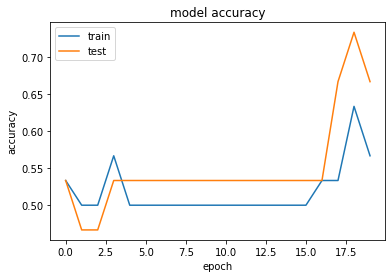

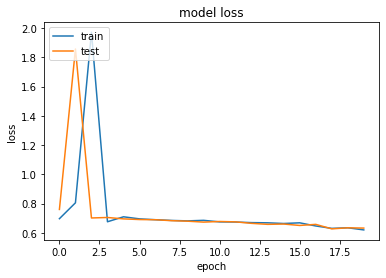

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()